<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220606/Modeling_0606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리가 완료된 데이터를 통해 적절한 모델을 선정
    - KFold cross validation

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [60]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220606/titanic/data/'
data = pd.read_csv(base_path + 'final_data.csv')
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


## kaggle 필사와 차이점

     Age, Fare column을 categorical feature로 바꾸지 않고 그대로 사용.
     Family_Size - Alone 상관관계가 높아 보이므로 Family_Size column 학습에서 제거

In [ ]:
# data[['SibSp', 'Parch', 'Family_Size']].corr()

,SibSp,Parch,Family_Size
SibSp,1.000000,0.414838,0.890712
Parch,0.414838,1.000000,0.783111
Family_Size,0.890712,0.783111,1.000000


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data['feature'] = data.drop(columns='Family_Size').columns
# vif_data['VIF'] = [variance_inflation_factor(data.drop(columns='Family_Size').values, i) for i in range(len(data.drop(columns='Family_Size').columns))]

In [ ]:
# vif_data

,feature,VIF
0,Survived,2.842822
1,Pclass,17.109283
2,Age,10.534577
3,SibSp,2.220606
4,Parch,2.058507
5,Fare,2.373491
6,Alone,6.061956
7,Sex_male,39.085713
8,Embarked_Q,1.673783
9,Embarked_S,5.361736


In [ ]:
# data = data.drop(columns='Family_Size')
# data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_male,Embarked_Q,Embarked_S,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,0


### Modeling
 - 여러가지 분류 모델을 통해 생존 예측
        Logistic Regression
        Support Vector Machine(Linear and radial)
        Random Forest
        K-Nearest Neighbours
        Naive Bayes
        Decision Tree
        Logistic Regression
 - cross validation을 통해 좀 더 일반적인 성능을 관측
        cross_val_score
        KFold

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [62]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop(columns='Survived')
y = data['Survived']

X_train, X_val, y_train, y_val = \
train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
# scaler = MinMaxScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_val = scaler.transform(X_val)

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
pred = model.predict(X_val)
accuracy_score(y_val, pred)

0.8100558659217877

#### Logistic Regression

In [66]:
from sklearn.pipeline import Pipeline
## pipeline을 사용해서 코드를 좀 더 간단하게

pipe = Pipeline([('LR', LogisticRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8100558659217877

#### Radial Support Vector Machine (rbf-SVM)

In [69]:
pipe = Pipeline([('SVC', SVC(kernel='rbf', C=1, gamma=0.1))])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8324022346368715

#### Linear Support Vector Machine (linear-SVM)

In [68]:
pipe = Pipeline([('SVC', SVC(kernel='linear', C=0.1, gamma=0.1))])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8044692737430168

#### Decision Tree

In [70]:
pipe = Pipeline([('DT', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8156424581005587

#### K-Nearest Neighbours(KNN)

In [71]:
pipe = Pipeline([('KNN', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8435754189944135

In [74]:
from sklearn.model_selection import GridSearchCV
hyper = {
    'n_neighbors': list(range(1, 11))
}
gd = GridSearchCV(estimator=KNeighborsClassifier(), 
                  param_grid=hyper, verbose=True)
gd.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [75]:
print(gd.best_score_)
print(gd.best_params_)

0.8148452702278577
{'n_neighbors': 9}


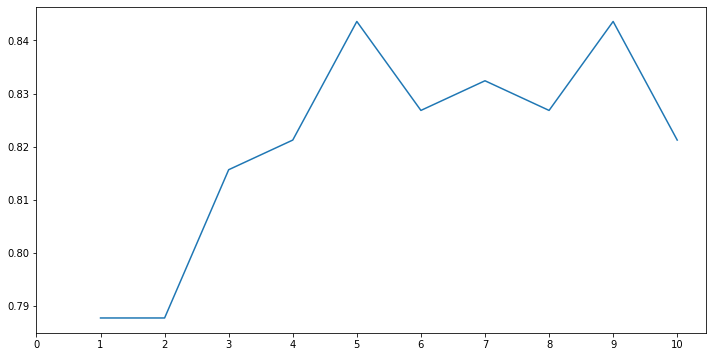

Accuracies for different values of n are: [0.7877095  0.7877095  0.81564246 0.82122905 0.84357542 0.82681564
 0.83240223 0.82681564 0.84357542 0.82122905] with the max value as  0.8435754189944135


In [79]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_val)
    a=a.append(pd.Series(accuracy_score(prediction,y_val)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [80]:
pipe = Pipeline([('GNB', GaussianNB())])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8100558659217877

#### Random Forests

In [81]:
pipe = Pipeline([('RanF', RandomForestClassifier(n_estimators=100))])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8268156424581006

### cross validation

In [85]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.808102,0.042658
Naive Bayes,0.795843,0.054861
Random Forest,0.812622,0.043246
